In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px
from sklearn.cluster import SpectralClustering

In [46]:
df=pd.read_csv("C:/Users/askma/OneDrive/Desktop/IS_665/CC GENERAL.csv")

In [47]:
df.drop('CUST_ID', axis=1, inplace=True)

In [48]:
df.fillna(method ='ffill', inplace = True)

In [49]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'WCSS')

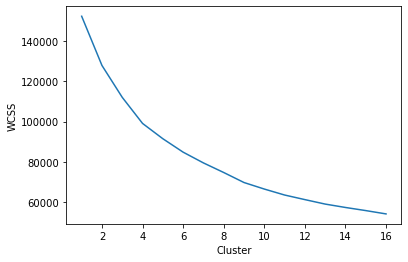

In [50]:
score_1 = []
range_values = range(1, 17)
for i in range_values:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    score_1.append(kmeans.inertia_)

plt.plot(range(1,17),score_1)
plt.xlabel('Cluster')
plt.ylabel('WCSS')

In [51]:
kmeans = KMeans(7)
kmeans.fit(df_scaled)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(7, 17)

In [52]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.337394          0.357037   0.043666        -0.076380   
1 -0.701574         -2.137976  -0.306764        -0.232354   
2  1.641118          0.397990  -0.220449        -0.155611   
3 -0.347278         -0.335777  -0.280396        -0.206989   
4  0.572697          0.459448   1.844109         1.577877   
5  1.923051          0.337717  11.212042        10.600367   
6  0.007552          0.402984  -0.348075        -0.228787   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.243270    -0.368976            0.983063   
1              -0.298356    -0.321791           -0.534933   
2              -0.235435     1.956066           -0.469374   
3              -0.282366     0.052265           -0.168696   
4               1.461476    -0.229389            1.152842   
5               7.033118     0.419625            1.046983   
6              -0.402462    -0.108208           -0.832913   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.225154                         0.893966   
1                  -0.439711                        -0.422445   
2                  -0.187324                        -0.424158   
3                  -0.270088                        -0.205723   
4                   1.783866                         0.984355   
5                   1.915501                         0.981334   
6                  -0.366301                        -0.758540   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.472086        -0.360460      0.241844    -0.132688   
1              -0.522786        -0.377482     -0.414214    -0.174966   
2               1.891772         1.881261     -0.265480     0.999239   
3               0.288094        -0.009966     -0.378874    -0.564822   
4              -0.340023        -0.251539      2.160156     1.132436   
5              -0.258912         0.061229      5.362438     3.044076   
6               0.081555        -0.044027     -0.472758    -0.307892   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.171992        -0.079869         0.344795  0.272332  
1 -0.191408        -0.245618         0.288545  0.201626  
2  0.772348         0.516963        -0.397350  0.071215  
3 -0.390175        -0.204696         0.023253 -3.178142  
4  1.005431         0.220418         0.436664  0.311375  
5  8.098975         1.098047         1.110132  0.310863  
6 -0.250558        -0.006164        -0.455786  0.271928

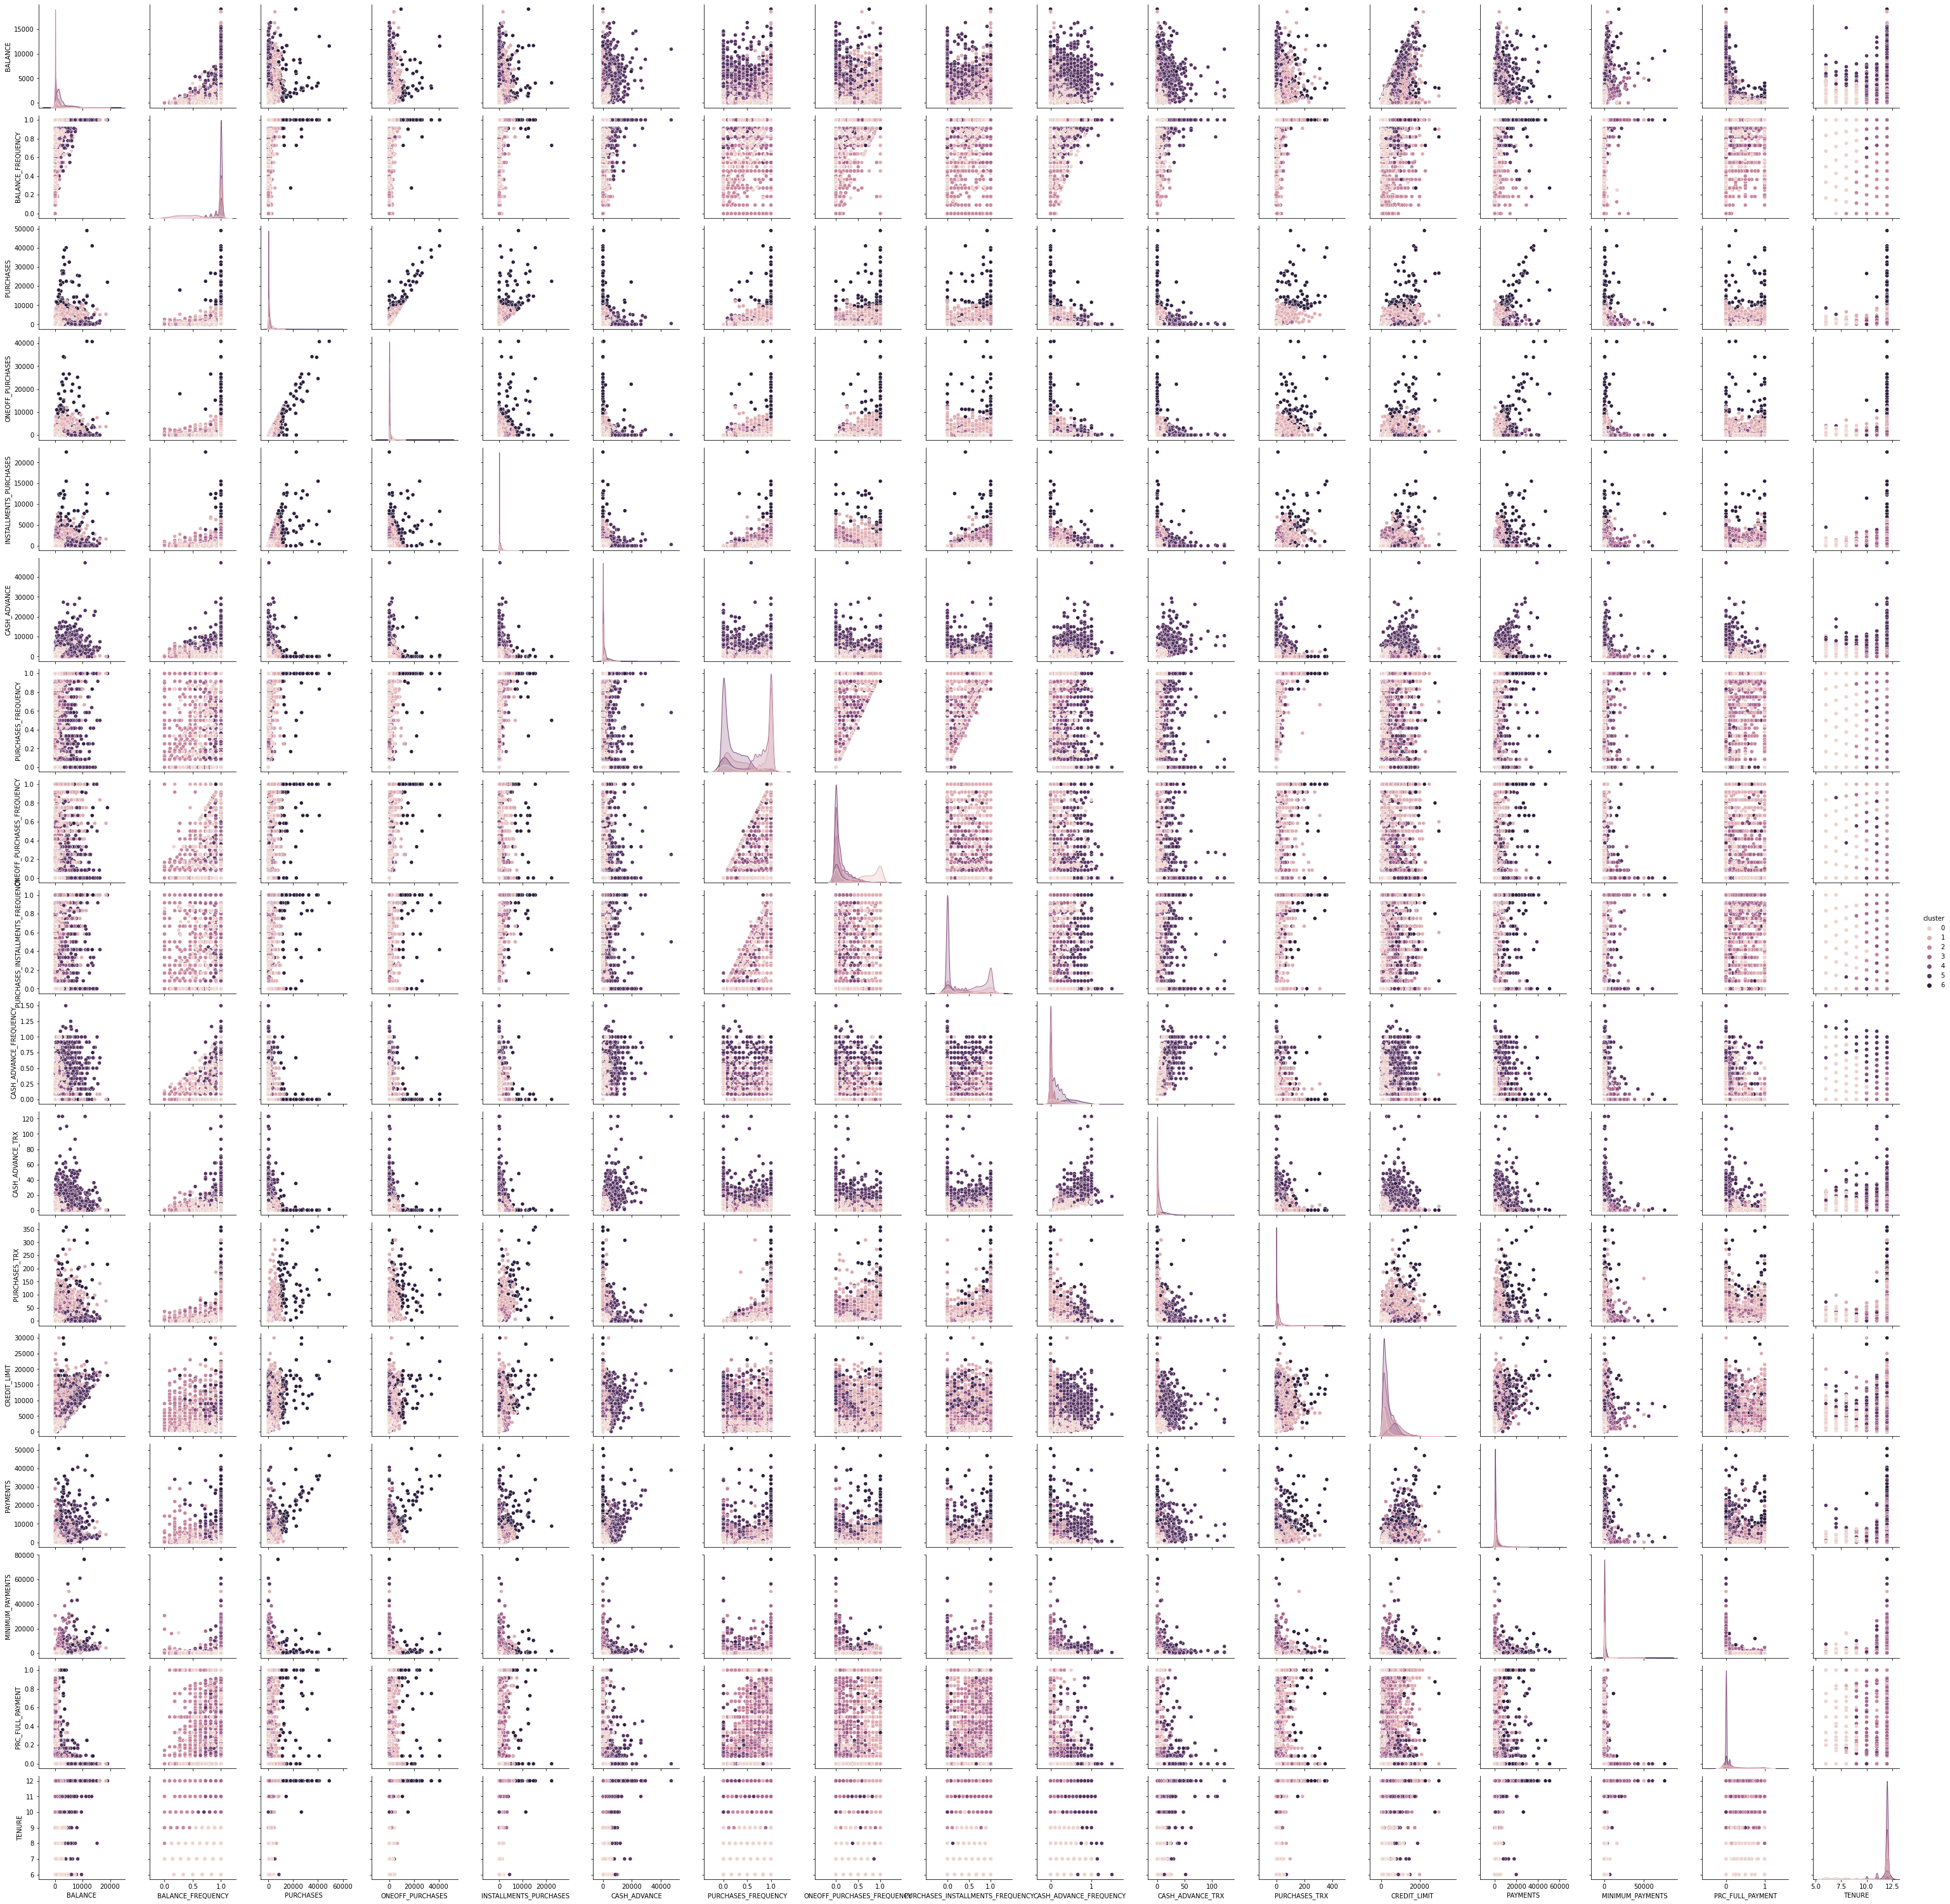

In [53]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(df_scaled)

# As it's difficult to visualise clusters when the data is high-dimensional - we'll see
# if Seaborn's pairplot can help us see how the clusters are separating out the samples.   
df["cluster"] = y_pred
cols = list(df.columns)

sns.pairplot(df[cols], hue="cluster")